In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


**Load dataset**

In [ ]:
# Read the data
features_df = pd.read_csv('/content/features.csv')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
features_df.dtypes

,0
Store,int64
Date,object
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64
CPI,float64


In [ ]:
features_df.shape

(8190, 12)

In [ ]:
# Read the data
stores_df = pd.read_csv('/content/stores.csv')
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
stores_df.dtypes

,0
Store,int64
Type,object
Size,int64


In [ ]:
stores_df.shape

(45, 3)

In [ ]:
# Read the data
train_df = pd.read_csv('/content/train 2.csv')
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
train_df.dtypes

,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool


In [ ]:
train_df.shape

(421570, 5)

**Missing Values**

In [ ]:
features_df.isna().sum()


,0
Store,0
Date,0
Temperature,0
Fuel_Price,0
MarkDown1,4158
MarkDown2,5269
MarkDown3,4577
MarkDown4,4726
MarkDown5,4140
CPI,585


In [ ]:
stores_df.isna().sum()


,0
Store,0
Type,0
Size,0


In [ ]:
train_df.isna().sum()


,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0


**Checking Duplicates**

In [ ]:
features_df.duplicated().sum()


0

In [ ]:
stores_df.duplicated().sum()


0

In [ ]:
train_df.duplicated().sum()


0

**Merging Dataframes**

In [ ]:
# merging 3 different sets
walmart_df = train_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner')
walmart_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [ ]:
walmart_df.dtypes

,0
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday_x,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


In [ ]:
walmart_df.shape

(421570, 17)

**Removing and Renaming Column**

In [ ]:
# Removing duplicated column
walmart_df.drop(['IsHoliday_y'], axis=1,inplace=True)

# Renaming the column
walmart_df.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)


**Weekly Sales With Negative Values**

In [ ]:
# Checking the weekly sales with negative values
walmart_df.loc[walmart_df['Weekly_Sales']<=0]


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


1358 rows in 421570 rows means 0.3% have negative weekly sales, so I can delete and ignore these rows which contains wrong sales values.

In [ ]:
# Keeping data which has positive weekly sales
walmart_df = walmart_df.loc[walmart_df['Weekly_Sales'] > 0]
walmart_df.shape


(420212, 16)

**Date Column**

**Changing date (object type) to datetime type**

In [ ]:
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'],format = "%Y-%m-%d")
walmart_df.head()
walmart_df.dtypes

,0
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
IsHoliday,bool
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64


**Function to specify the season**

In [ ]:
def Sesson_getter(quarter):
    if quarter ==1:
        return 'Winter'
    elif quarter == 2:
        return 'Spring'
    elif quarter == 3:
        return 'Summer'
    else:
        return 'Fall'

**Extracting year, month, week, day of week, quarter/season from Date variable of Walmart Data**

In [ ]:
walmart_df['Year'] = walmart_df['Date'].dt.year # to add a year column

walmart_df['Month'] = walmart_df['Date'].dt.month # to add a month coumn
walmart_df['Month_Name'] = walmart_df['Date'].dt.month_name() # to add a month_name column

walmart_df['Week'] = walmart_df['Date'].dt.isocalendar().week # to add a week column
walmart_df['Day_Of_Week'] = walmart_df['Date'].dt.day_name() # to add a day_name column

walmart_df['Quarter'] = walmart_df['Date'].dt.quarter # to add a quarter column (q1, q2, q3 and q3)
walmart_df['Season'] = walmart_df['Quarter'].apply(Sesson_getter) # applied the previously defined function to get the season names

In [ ]:
walmart_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Labor_Day,Thanksgiving,Christmas,Year,Month,Month_Name,Week,Day_Of_Week,Quarter,Season
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,False,False,False,2010,2,February,5,Friday,1,Winter
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,False,False,False,2010,2,February,6,Friday,1,Winter
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,False,False,False,2010,2,February,7,Friday,1,Winter
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,False,False,False,2010,2,February,8,Friday,1,Winter
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,False,False,False,2010,3,March,9,Friday,1,Winter


In [ ]:
# Best Month for sale
walmart_df.groupby('Month')['Weekly_Sales'].mean() # to see the best months for sales


,Weekly_Sales
Month,
1,14182.239153
2,16048.701191
3,15464.817698
4,15696.435193
5,15845.556200
6,16397.605478
7,15905.472425
8,16113.800069
9,15147.216063


In [ ]:
# Best Year
walmart_df.groupby('Year')['Weekly_Sales'].mean()


,Weekly_Sales
Year,
2010,16318.648285
2011,16007.797985
2012,15748.265005


Monthly

<Axes: xlabel='Month'>

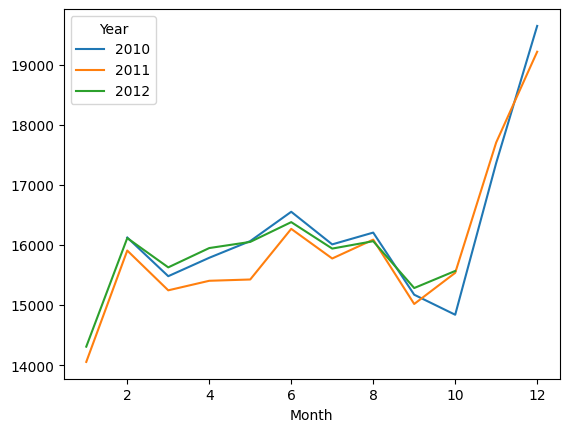

In [ ]:
monthly_sales = pd.pivot_table(walmart_df, values = "Weekly_Sales", columns = "Year", index = "Month")
monthly_sales.plot()

The graph shows that sales in 2011 were generally lower than in 2010. The mean sales for 2010 are higher than those for 2011. However, 2012's data is missing sales for November and December, which are typically the months with the highest sales. Despite this, the mean sales for 2012 are close to those of 2010. If the sales data for November and December 2012 were included, it is likely that 2012 would surpass 2010 in terms of total sales.

<Axes: xlabel='Week'>

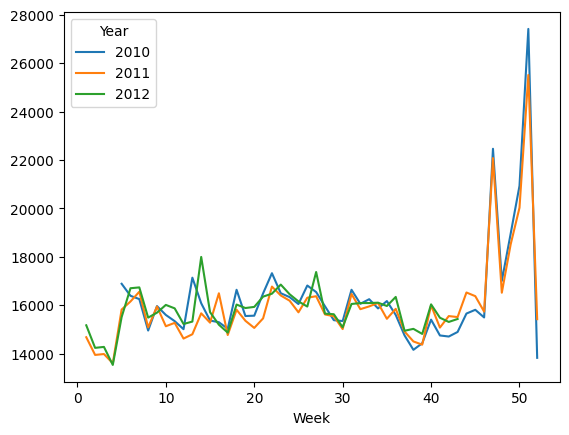

In [ ]:
monthly_sales = pd.pivot_table(walmart_df, values = "Weekly_Sales", columns = "Year", index = "Week")
monthly_sales.plot()

In [ ]:
walmart_df.groupby('Week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

,Weekly_Sales
Week,
51,26454.164116
47,22269.601768
50,20478.421134
49,18731.794840
22,16856.650245


Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed.

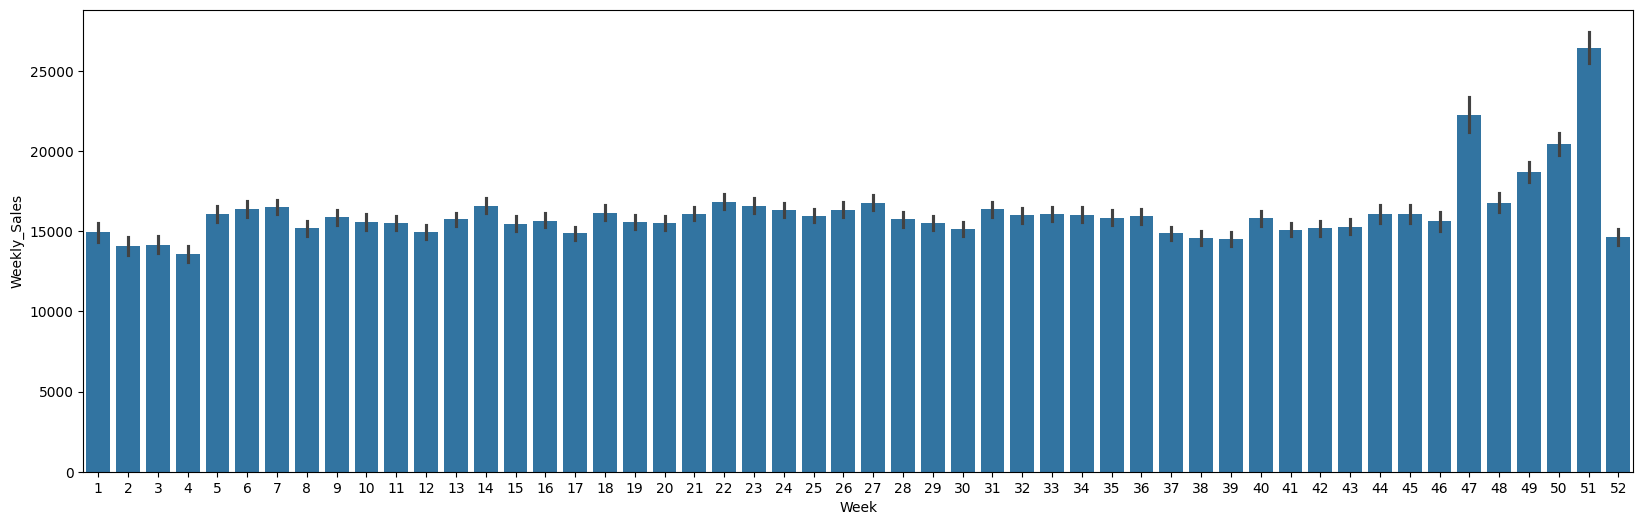

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Week', y='Weekly_Sales', data=walmart_df)

From graphs, it is seen that 51th week and 47th weeks have significantly higher averages as Christmas, Thankgiving and Black Friday effects.

In [ ]:
# Get the minimum and maximum dates
start_date = walmart_df['Date'].min()
end_date = walmart_df['Date'].max()

# Display the result
print(f"The data is available from {start_date.date()} to {end_date.date()}.")


The data is available from 2010-02-05 to 2012-10-26.


**Holiday Season**

In [ ]:
# Holiday Time
walmart_df_holiday = walmart_df.loc[walmart_df['IsHoliday']==True]
walmart_df_holiday['Date'].unique()

<DatetimeArray>
['2010-02-12 00:00:00', '2010-09-10 00:00:00', '2010-11-26 00:00:00',
 '2010-12-31 00:00:00', '2011-02-11 00:00:00', '2011-09-09 00:00:00',
 '2011-11-25 00:00:00', '2011-12-30 00:00:00', '2012-02-10 00:00:00',
 '2012-09-07 00:00:00']
Length: 10, dtype: datetime64[ns]

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

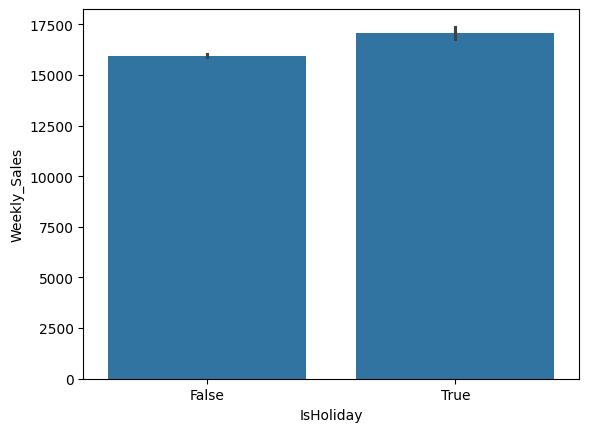

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=walmart_df)


In [ ]:
# Not Holiday Time
walmart_df_not_holiday = walmart_df.loc[walmart_df['IsHoliday']==False]
walmart_df_not_holiday['Date'].unique()

<DatetimeArray>
['2010-02-05 00:00:00', '2010-02-19 00:00:00', '2010-02-26 00:00:00',
 '2010-03-05 00:00:00', '2010-03-12 00:00:00', '2010-03-19 00:00:00',
 '2010-03-26 00:00:00', '2010-04-02 00:00:00', '2010-04-09 00:00:00',
 '2010-04-16 00:00:00',
 ...
 '2012-08-17 00:00:00', '2012-08-24 00:00:00', '2012-08-31 00:00:00',
 '2012-09-14 00:00:00', '2012-09-21 00:00:00', '2012-09-28 00:00:00',
 '2012-10-05 00:00:00', '2012-10-12 00:00:00', '2012-10-19 00:00:00',
 '2012-10-26 00:00:00']
Length: 133, dtype: datetime64[ns]

There are 4-holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Super Bowl: '2010-02-12', '2011-02-11', '2012-02-10'  
Next year's Super Bowl Date: '2013-02-08'

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Labor Day: '2010-09-10', '2011-09-09', '2012-09-07'  
Next year's Labour Day Date: '2013-09-06'

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Thanksgiving: '26-11-10', '25-11-11', '23-11-12'  
Next year's Thanksgiving Day Date: '29-11-13'  

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
Christmas: '31-12-10', '30-12-11', '28-12-12'
Next year's Christmas Date: 27-12-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [ ]:
# Super bowl dates in train set - Super Bowl Holiday Or Not
walmart_df.loc[(walmart_df['Date'] == '2010-02-12')|(walmart_df['Date'] == '2011-02-11')|(walmart_df['Date'] == '2012-02-10'),'Super_Bowl'] = True
walmart_df.loc[(walmart_df['Date'] != '2010-02-12')&(walmart_df['Date'] != '2011-02-11')&(walmart_df['Date'] != '2012-02-10'),'Super_Bowl'] = False

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

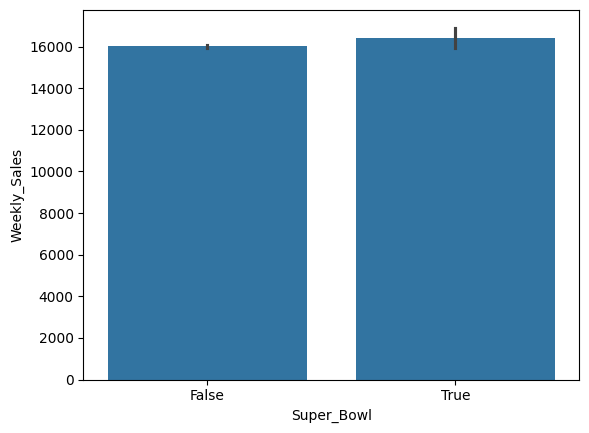

In [ ]:
# Super_Bowl holiday vs Not-Super_Bowl
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=walmart_df)


In [ ]:
# Labor day dates in train set - Labour Day Holiday Or Not
walmart_df.loc[(walmart_df['Date'] == '2010-09-10')|(walmart_df['Date'] == '2011-09-09')|(walmart_df['Date'] == '2012-09-07'),'Labor_Day'] = True
walmart_df.loc[(walmart_df['Date'] != '2010-09-10')&(walmart_df['Date'] != '2011-09-09')&(walmart_df['Date'] != '2012-09-07'),'Labor_Day'] = False

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

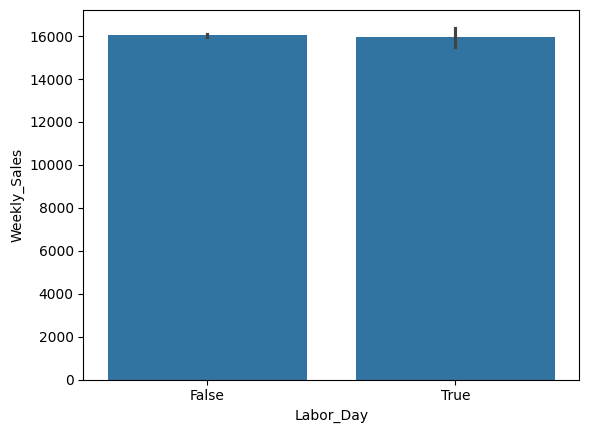

In [ ]:
# Labor_Day holiday vs Not-Labor_Day
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=walmart_df)

In [ ]:
# Thanksgiving dates in train set - Thanksgiving Holiday Or Not
walmart_df.loc[(walmart_df['Date'] == '2010-11-26')|(walmart_df['Date'] == '2011-11-25'),'Thanksgiving'] = True
walmart_df.loc[(walmart_df['Date'] != '2010-11-26')&(walmart_df['Date'] != '2011-11-25'),'Thanksgiving'] = False

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

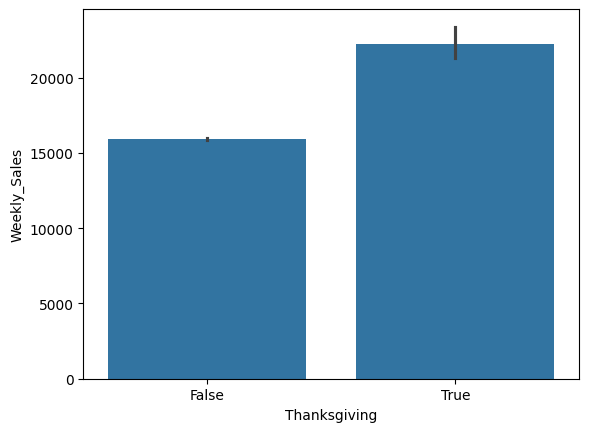

In [ ]:
# Thanksgiving holiday vs Not-Thanksgiving
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=walmart_df)

In [ ]:
#Christmas dates in train set - Christmas Holiday Or Not
walmart_df.loc[(walmart_df['Date'] == '2010-12-31')|(walmart_df['Date'] == '2011-12-30'),'Christmas'] = True
walmart_df.loc[(walmart_df['Date'] != '2010-12-31')&(walmart_df['Date'] != '2011-12-30'),'Christmas'] = False


<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

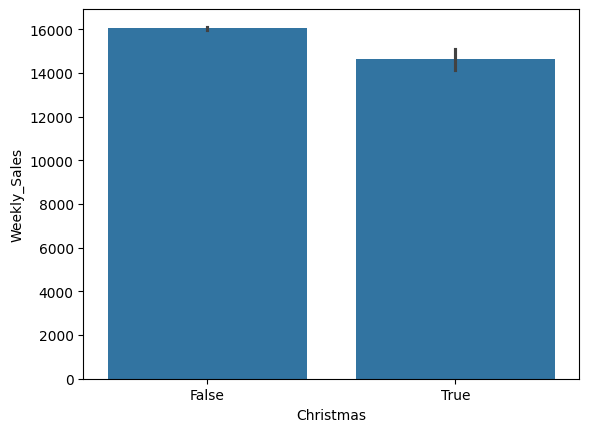

In [ ]:
# Christmas holiday vs Not-Christmas
sns.barplot(x='Christmas', y='Weekly_Sales', data=walmart_df)

The graphs indicate that weekly average sales do not see an increase during Labor Day and Christmas. Sales do rise around the Super Bowl, but the most significant increase occurs during Thanksgiving. It seems that people tend to purchase Christmas gifts a week or two before Christmas, which is why sales don't spike in the actual Christmas week. Additionally, the Thanksgiving week features Black Friday, which drives higher sales.

**Type Effect on Holidays**

There are three different store types in the dataset A, B, and C.
We will take a look at the Average Weekly Sales by Store Type as per Holiday seasons.



In [ ]:
# Avg weekly sales for types on Super Bowl
walmart_df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()


Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [ ]:
# Avg weekly sales for types on Labor Day
walmart_df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [ ]:
# Avg weekly sales for types on Thanksgiving
walmart_df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()


Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [ ]:
# Avg weekly sales for types on Christmas
walmart_df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()


Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

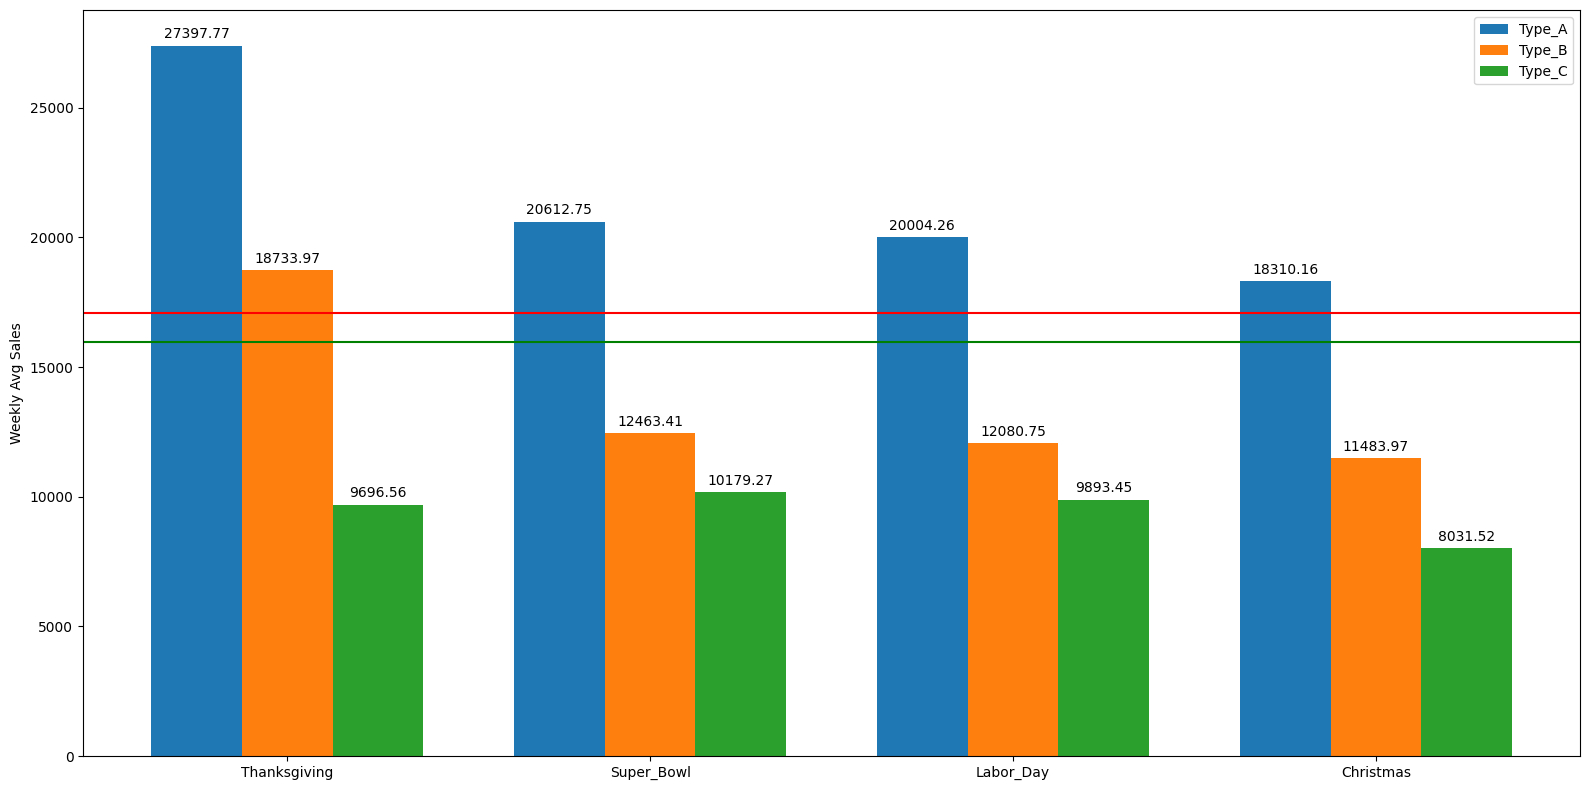

In [ ]:
import matplotlib.pyplot as plt

# Plotting avg weekly sales according to holidays by types
#plt.style.use('seaborn-darkgrid')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Holidays Avg Line
plt.axhline(y=17094.30,color='r')

# Not-Holiday Avg Line
plt.axhline(y=15952.82,color='green')

fig.tight_layout()

plt.show()

From the graph, the highest weekly average sale is in the "Thanksgiving" week between holidays. And, for all holidays, the Type A store has the highest weekly sales.

**Size-Type Relation**

In [ ]:
stores_df.groupby('Type').describe()['Size'].round(2)

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


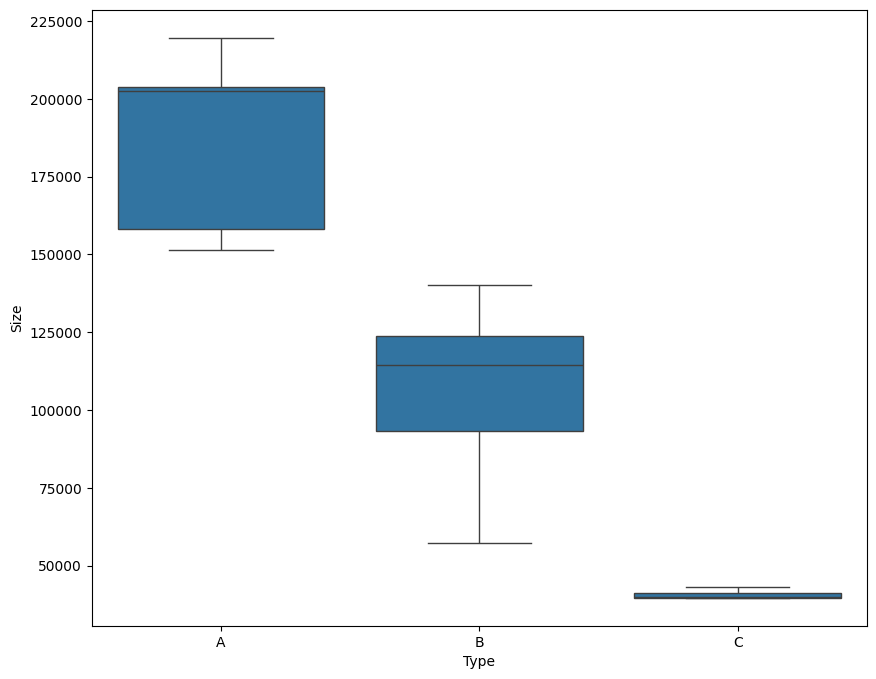

In [ ]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=walmart_df, showfliers=False)


Size of the type of stores are consistent with sales, as expected. Higher size stores has higher sales. And, Walmart classify stores according to their sizes according to graph. After the smallest size value of Type A, Type B begins. After the smallest size value of Type B, Type C begins.

**Deeper Look in Sales**

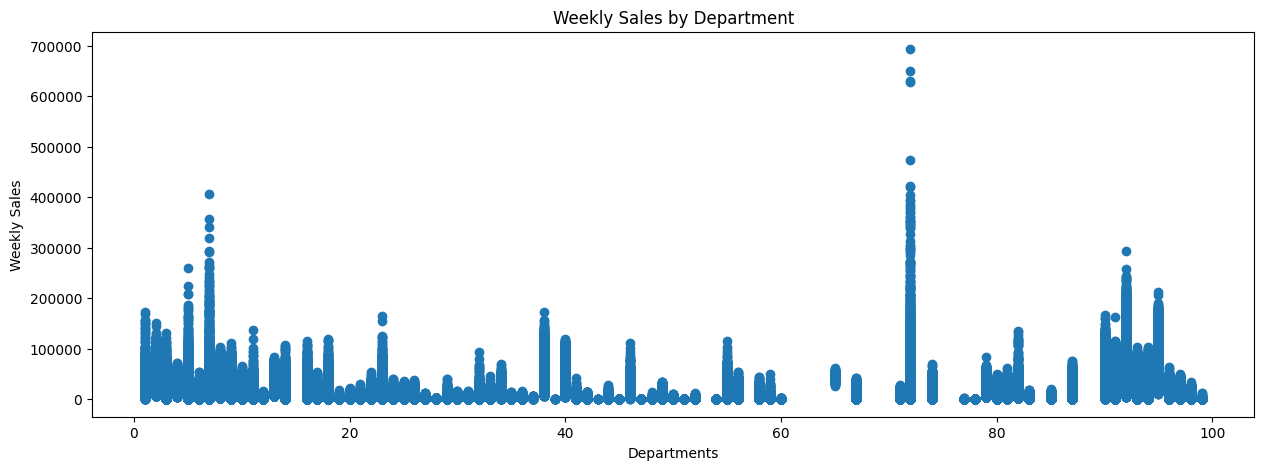

In [ ]:
# Department-wise Weekly Sales
x = walmart_df['Dept']
y = walmart_df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()


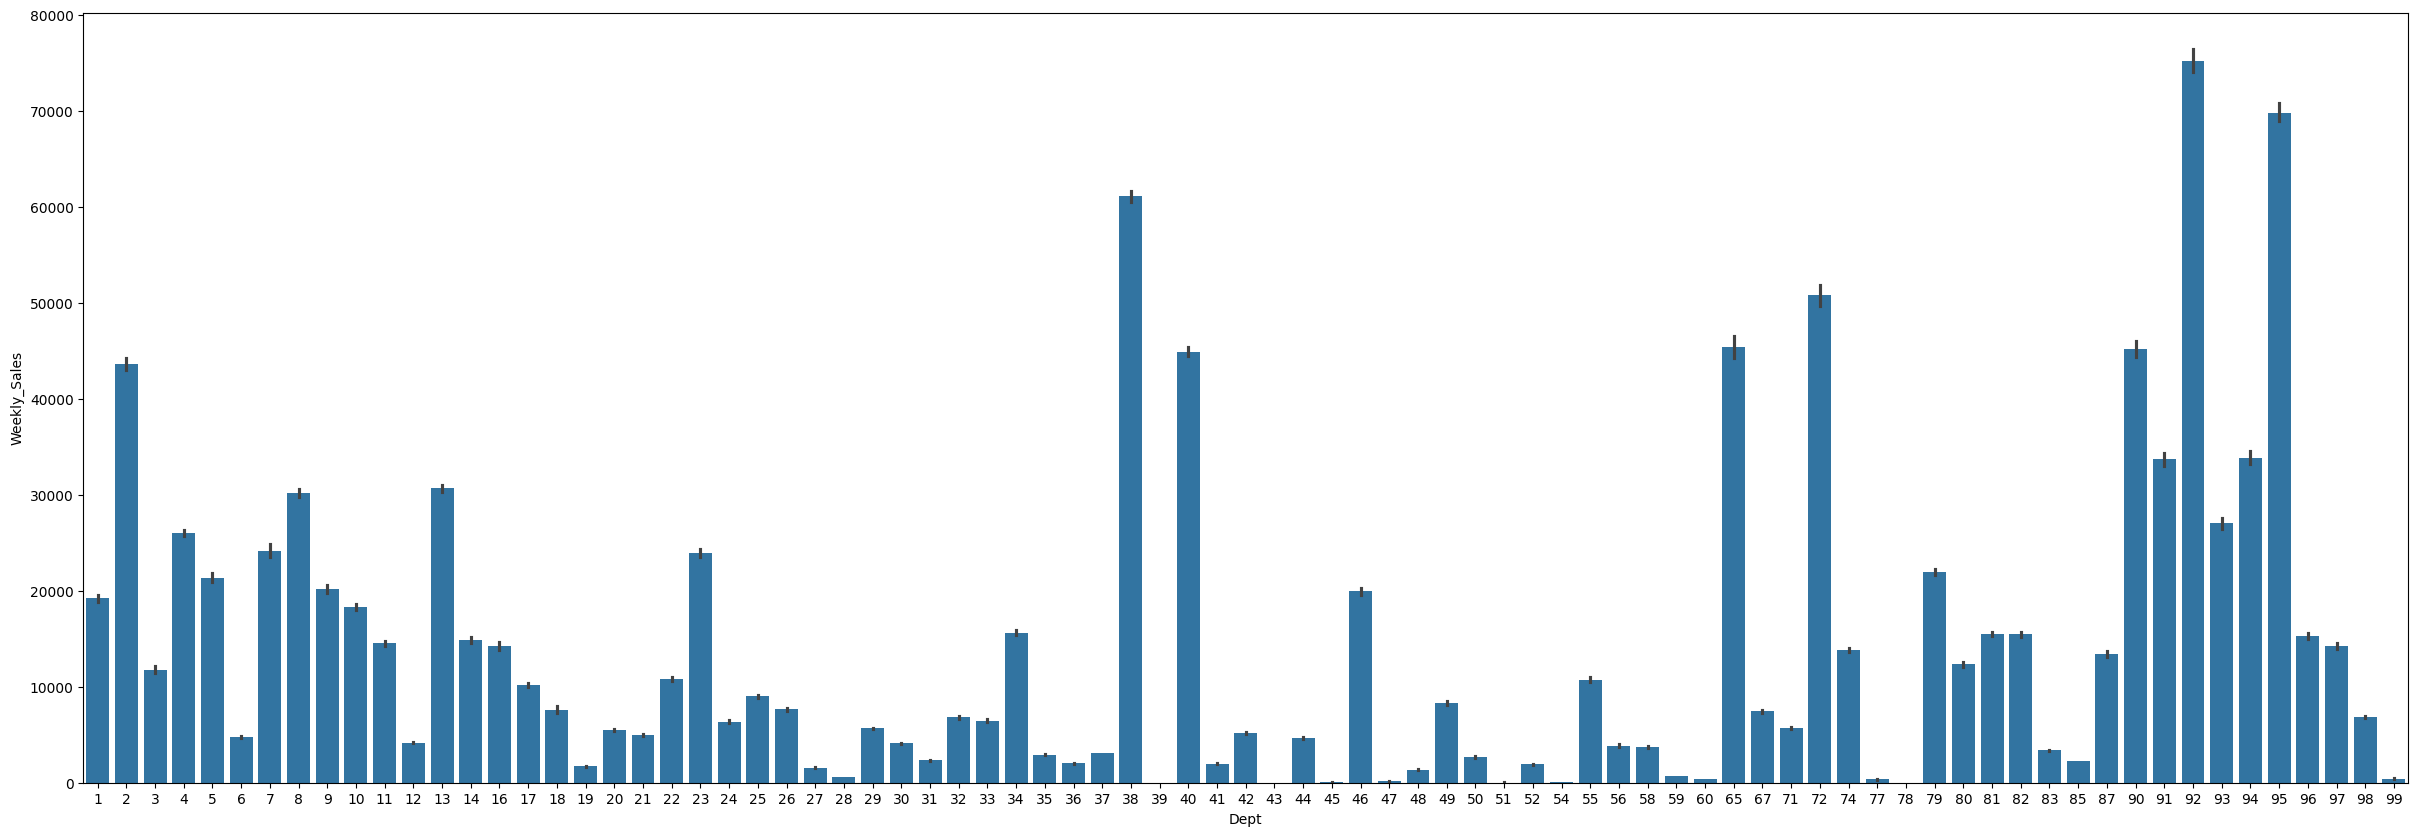

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=walmart_df)

From the first graph, it is seen that one department between 60-80(I assume it is 72), has higher sales values. But, when we take the averages, it is seen that department 92 has higher mean sales. Department 72 is seasonal department, I think. It has higher values is some seasons but on average 92 is higher.

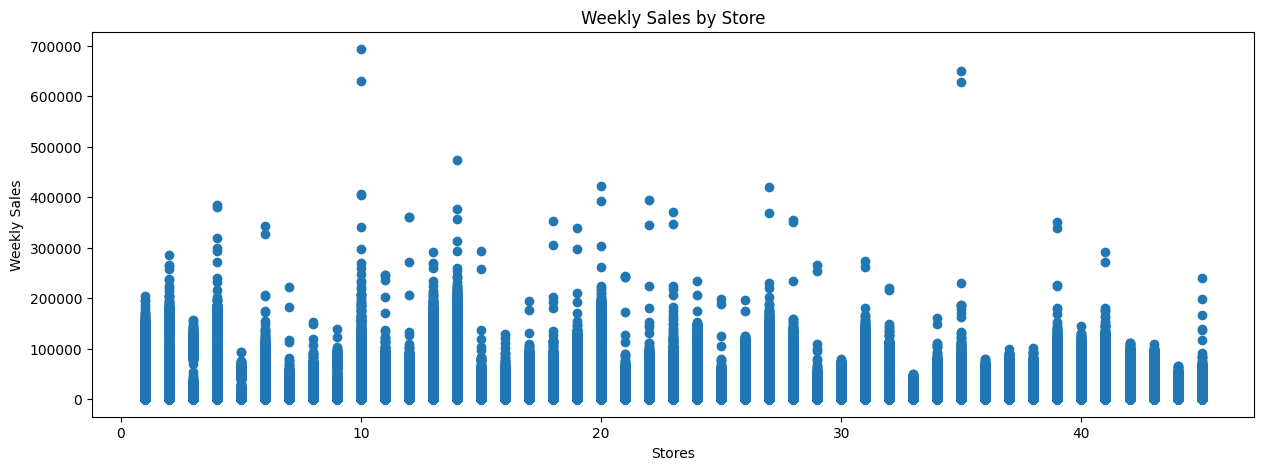

In [ ]:
# Store-wise Weekly Sales
x = walmart_df['Store']
y = walmart_df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

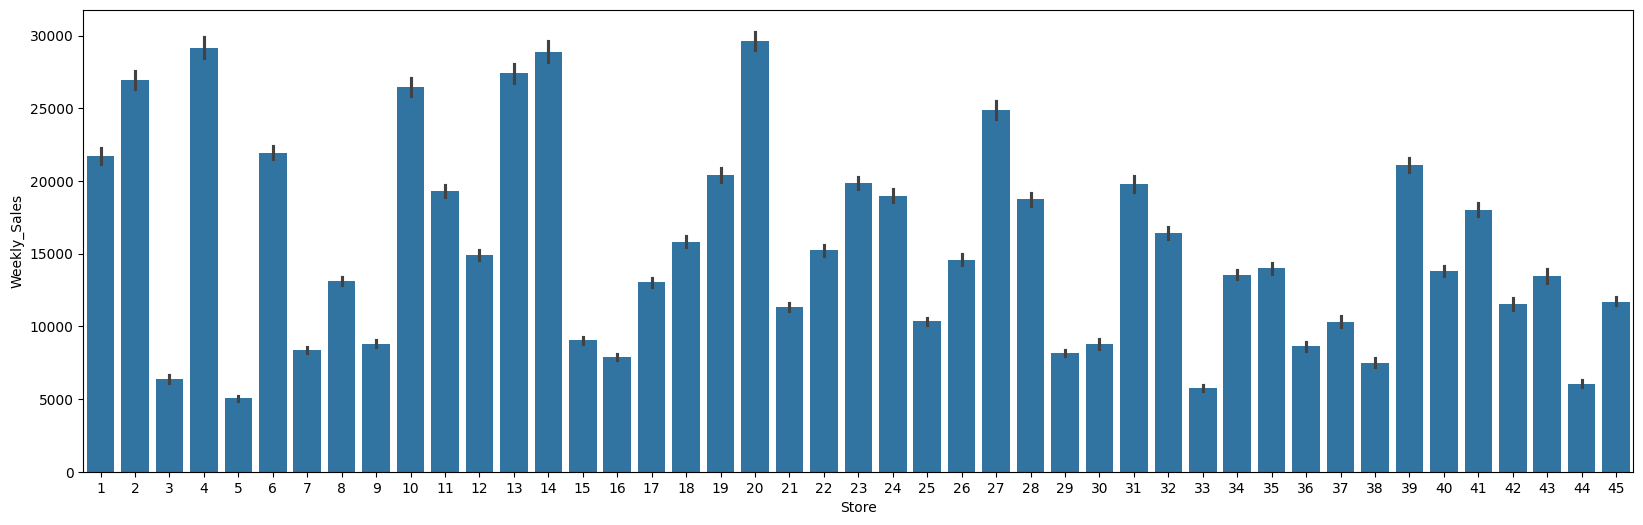

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=walmart_df)

From the first graph, some stores has higher sales but on average Store-20 is the best and then Store-4 and then Store-14 following it

**Fuel Price, CPI , Unemployment , Temperature Effects**